In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs
import pandas as pd 
from cell2location.utils.filtering import filter_genes

Global seed set to 0


In [28]:
from cell2location.models import RegressionModel


In [20]:
def convert_celltype_name_into_array(sp_cluster,sp_ct_name):
    annotation_spatial_barcode_id= sp_cluster[:,0]
    annotation_spatial_cluster_id= sp_cluster[:,1]
    spatialcell_unique_clustername=sp_ct_name[:,1]
    spatialcell_unique_clusterid=sp_ct_name[:,0]
    d={}
    for i in range(len(sp_ct_name)):
        d[sp_ct_name[i,0]]=sp_ct_name[i,1]
    annotation_spatial_celltypename=[]
    for i in range(len(annotation_spatial_cluster_id)):
        #print(i,annotation_spatial_cluster_id[i],type(annotation_spatial_cluster_id[i]))
        annotation_spatial_celltypename.append(d[annotation_spatial_cluster_id[i]])
    annotation_spatial_celltypename=np.array(annotation_spatial_celltypename)
    
    return annotation_spatial_celltypename


In [2]:
results_folder = './results/intestine/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'

In [3]:
scdatapath='./IntestineFresh/inputSC/'
spdatapath='./IntestineFresh/inputSP/'

spa_data = sc.read_h5ad(spdatapath+'common_counts_sp.h5ad')
seq_data = sc.read_h5ad(scdatapath+'Original_counts.h5ad')

In [4]:
#default parameter 
cell_count_cutoff=5, 
cell_percentage_cutoff2=0.03, 
nonz_mean_cutoff=1.12

In [44]:
spa_data.uns.keys()

odict_keys([])

In [45]:
spa_data.obs['domain_id']=0
#spa_data.obs['domain_id']=seq_data.obs['domain_id'].astype('category')


In [6]:
print(spa_data)
print('\n',seq_data)

AnnData object with n_obs × n_vars = 7416 × 188
    obs: 'n_counts'

 AnnData object with n_obs × n_vars = 2239 × 18573
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_doublet', 'doublet_score', 'Phenograph_cluster_k15_dbRM', 'coarse_cluster_dbRM', 'cell_state', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Phenograph_cluster_k15_dbRM_colors', 'cell_state_colors', 'coarse_cluster_dbRM_colors', 'dendrogram_Phenograph_cluster_k15_dbRM', 'hvg', 'neighbors', 'pca', 'test_elbo', 'test_epoch', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


/Users/agrawal/miniconda3/envs/scvi-env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


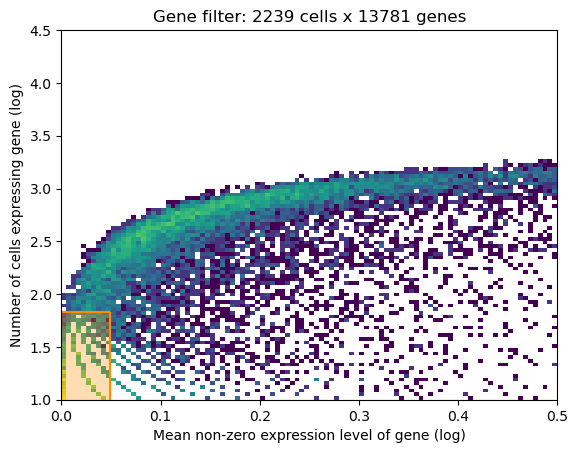

AnnData object with n_obs × n_vars = 2239 × 13781
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_doublet', 'doublet_score', 'Phenograph_cluster_k15_dbRM', 'coarse_cluster_dbRM', 'cell_state', 'n_counts', 'cell_type', 'domain_id', 'Method'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'nonz_mean'
    uns: 'Phenograph_cluster_k15_dbRM_colors', 'cell_state_colors', 'coarse_cluster_dbRM_colors', 'dendrogram_Phenograph_cluster_k15_dbRM', 'hvg', 'neighbors', 'pca', 'test_elbo', 'test_epoch', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [24]:
selected = filter_genes(seq_data, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
adata_ref = seq_data[:, selected].copy()

print(adata_ref)

In [22]:
name=scdatapath+'cluster_SI_merge.csv'
#name=scdatapath+'/scdata2_most_recent/cluster_poss4_25.csv'
df=pd.read_csv(name)
sc_cluster=df.to_numpy()

#celltypefname=scdatapath+'nameOfCT_SI_cellstate.dat'
celltypefname=scdatapath+'nameOfCT_SI_merge.dat'
df=pd.read_csv(celltypefname,sep='\t',header=None)
sc_CTname=df.to_numpy()


In [23]:
cluSC=convert_celltype_name_into_array(sc_cluster,sc_CTname)
seq_data.obs['cell_type']=cluSC
seq_data.obs['domain_id']=0
seq_data.obs['domain_id']=seq_data.obs['domain_id'].astype('category')
seq_data.obs['Method']='RNA'
#seq_data.obs['labels']=sc_cluster[:,1

In [25]:
adata_ref

AnnData object with n_obs × n_vars = 2239 × 13781
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_doublet', 'doublet_score', 'Phenograph_cluster_k15_dbRM', 'coarse_cluster_dbRM', 'cell_state', 'n_counts', 'cell_type', 'domain_id', 'Method'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'nonz_mean'
    uns: 'Phenograph_cluster_k15_dbRM_colors', 'cell_state_colors', 'coarse_cluster_dbRM_colors', 'dendrogram_Phenograph_cluster_k15_dbRM', 'hvg', 'neighbors', 'pca', 'test_elbo', 'test_epoch', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [26]:
# prepare anndata for the regression model
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        # 10X reaction / sample / batch
                        batch_key='domain_id',
                        # cell type, covariate used for constructing signatures
                        labels_key='cell_type',
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        categorical_covariate_keys=['Method']
                       )

In [29]:
# create the regression model
mod = RegressionModel(adata_ref)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.20.1.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'domain_id',
│   'labels_key': 'cell_type',
│   'categorical_covariate_keys': ['Method'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 2239  │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │  19   │
│          n_vars          │ 13781 │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['domain_id'] │     0      │          0          │
└────────────────────────┴────────────┴─────────────────────┘

                          labels State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │           BZE           │          0          │
│                        │       Blood vasc.       │          1          │
│                        │    Cycling/GC B cell    │          2          │
│                        │          Glial          │          3          │
│                        │         Goblet          │          4          │
│                        │        Lymphatic        │          5          │
│                        │           MZE           │          6          │
│                        │       Macrophage        │          7          │
│                        │         Paneth          │          8          │
│                        │         Plasma          │          9          │
│                        │         Rest B          │         10          │
│                        │         Stem/TA         │         11          │
│                        │         Stroma          │         12          │
│                        │         T cell          │         13          │
│                        │           TZE           │         14          │
│                        │          Tuft           │         15          │
│                        │      cDC/monocyte       │         16          │
│                        │ neurons/enteroendocrine │         17          │
│                        │           pDC           │         18          │
└────────────────────────┴─────────────────────────┴─────────────────────┘

          extra_categorical_covs State Registry           
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Method'] │    RNA     │          0          │
│                     │            │                     │
└─────────────────────┴────────────┴─────────────────────┘

In [32]:
mod.train(max_epochs=250)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/agrawal/miniconda3/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:106: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/Users/agrawal/miniconda3/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 250/250: 100%|█████████████████████████████████████████████████████████████| 250/250 [07:09<00:00,  1.71s/it, v_num=1, elbo_train=2.3e+7]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|█████████████████████████████████████████████████████████████| 250/250 [07:09<00:00,  1.72s/it, v_num=1, elbo_train=2.3e+7]


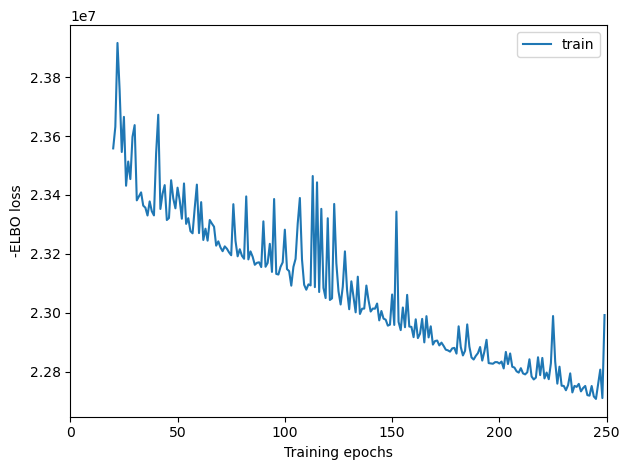

In [33]:
mod.plot_history(20)


In [34]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_ref = mod.export_posterior(
    adata_ref, sample_kwargs={'num_samples': 1000, 'batch_size': 2500}
)

# Save model
mod.save(f"{ref_run_name}", overwrite=True)

# Save anndata object with results
adata_file = f"{ref_run_name}/sc.h5ad"
adata_ref.write(adata_file)
adata_file

Sampling global variables, sample: 100%|█████████████████████████████████████████████████████████████████████| 999/999 [03:06<00:00,  5.34it/s]


'./results/intestine//reference_signatures/sc.h5ad'

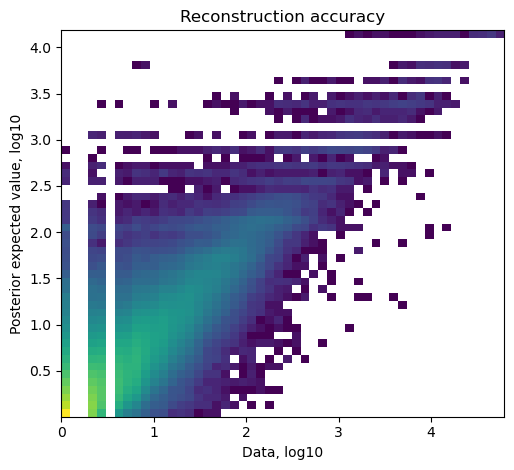

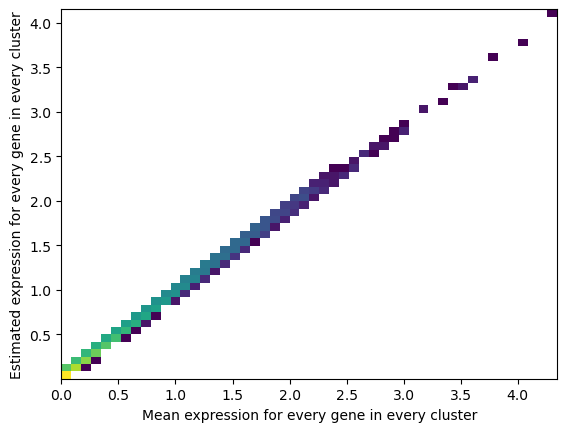

In [35]:
mod.plot_QC()


In [ ]:
#The model and output h5ad can be loaded later like this:
#adata_file = f"{ref_run_name}/sc.h5ad"
#adata_ref = sc.read_h5ad(adata_file)
#mod = cell2location.models.RegressionModel.load(f"{ref_run_name}", adata_ref)

In [37]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

,BZE,Blood vasc.,Cycling/GC B cell,Glial,Goblet
Gm19938,0.000168,0.000167,0.000165,0.478478,0.038737
Sox17,0.008816,1.198134,0.000167,0.000166,0.006982
Lypla1,4.356165,0.285260,0.349742,0.266132,2.090039
Tcea1,2.949460,0.370795,3.035839,0.814278,2.224245
Atp6v1h,0.751498,0.204380,0.408106,0.271503,0.528121


#spatial mapping 


In [46]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(spa_data.var_names, inf_aver.index)
adata_vis = spa_data[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="domain_id")

In [ ]:
N_cells_per_location=1
detection_alpha=20
detection_alpha=200

In [47]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=1,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.20.1.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'domain_id',
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 7416  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │  157  │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['domain_id'] │     0      │          0          │
└────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [49]:
mod.train(max_epochs=30000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
         )

# plot ELBO loss history during training, removing first 100 epochs from the plot
mod.plot_history(1000)
plt.legend(labels=['full data training']);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/agrawal/miniconda3/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:106: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/Users/agrawal/miniconda3/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 20964/30000:  70%|█████████████████████████████████████                | 20964/30000 [55:22<44:49,  3.36it/s, v_num=1, elbo_train=7.3e+5]

In [50]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod.adata.n_obs, 'use_gpu': False}
)

# Save model
mod.save(f"{run_name}", overwrite=True)

# mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

# Save anndata object with results
adata_file = f"{run_name}/sp.h5ad"
adata_vis.write(adata_file)
adata_file

Sampling global variables, sample: 100%|█████████████████████████████████████████████████████████████████████| 999/999 [00:17<00:00, 58.28it/s]


'./results/intestine//cell2location_map/sp.h5ad'

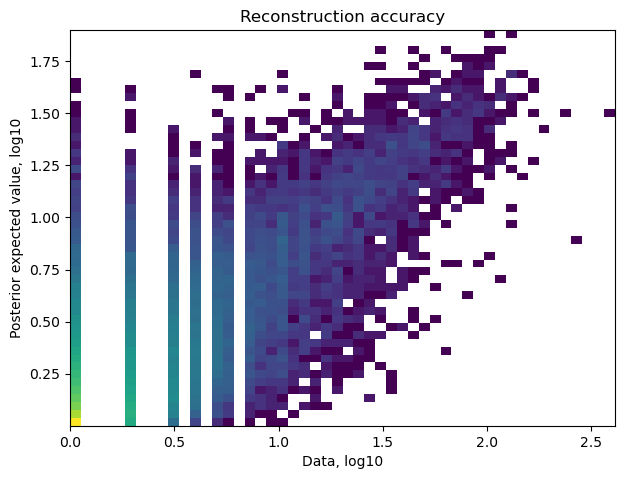

In [51]:
mod.plot_QC()


In [27]:
# prepare anndata for the regression model
'''
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        # 10X reaction / sample / batch
                        batch_key='Sample',
                        # cell type, covariate used for constructing signatures
                        labels_key='Subset',
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        categorical_covariate_keys=['Method']
                       )
 '''                      

"\ncell2location.models.RegressionModel.setup_anndata(adata=adata_ref,\n                        # 10X reaction / sample / batch\n                        batch_key='Sample',\n                        # cell type, covariate used for constructing signatures\n                        labels_key='Subset',\n                        # multiplicative technical effects (platform, 3' vs 5', donor effect)\n                        categorical_covariate_keys=['Method']\n                       )\n "

In [9]:


# Read data
ref = sc.read(
    f'./data/sc.h5ad',
    backup_url='https://cell2location.cog.sanger.ac.uk/paper/integrated_lymphoid_organ_scrna/RegressionNBV4Torch_57covariates_73260cells_10237genes/sc.h5ad'
)

  0%|          | 0.00/527M [00:00<?, ?B/s]

In [30]:
#ref

In [16]:
len(np.unique(ref.obs['Method']))

2

In [15]:
len(np.unique(ref.obs['Sample']))


23

In [17]:
len(np.unique(ref.obs['Subset']))


34